In [9]:
import os
import pickle
import sys
from pathlib import Path

import lab.torch as B
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from wbml import plot

torch.set_printoptions(precision=8, sci_mode=False, edgeitems=5)
torch.set_printoptions(profile='full') # 'short'

colors = sns.color_palette("bright")
sns.set_style("whitegrid")
sns.set_palette(colors)
matplotlib.rcParams["figure.dpi"] = 300  # for high quality, retina plots

from varz import Vars, namespace
from wbml import experiment, out, plot

In [2]:
main_dir = os.path.dirname(os.path.abspath(os.getcwd()))
def load_vs(exp_dir):    
    vs_path = os.path.join(exp_dir, "model/_vs.pt")
    vs_state_dict = torch.load(os.path.join(main_dir, vs_path), map_location=torch.device('cpu'))
    return vs_state_dict

In [3]:
def plot_yz(folder, ax, layer, bins):
    vs = load_vs(folder)
    x = pd.Series(vs[f'ts.client0_layer{layer}_yz'].flatten().squeeze().detach().cpu())
    ax.hist(x, bins=bins, density=True)
    # sns.histplot(ax=ax, data=x, bins=bins)

In [6]:
def plot_var(folder, ax):
    num_bins = 8
    vs = load_vs(folder)
    x = pd.Series(1/vs['ts.client0_layer2_nz'].flatten().squeeze().detach().cpu())
    hist, bins = np.histogram(x, bins=num_bins)
    logbins = np.logspace(np.log10(bins[0]), np.log10(bins[-1]), len(bins))
    ax.hist(x, bins=logbins)
    # sns.histplot(ax=ax, data=x, stat='probability')
    ax.set_xscale('log')


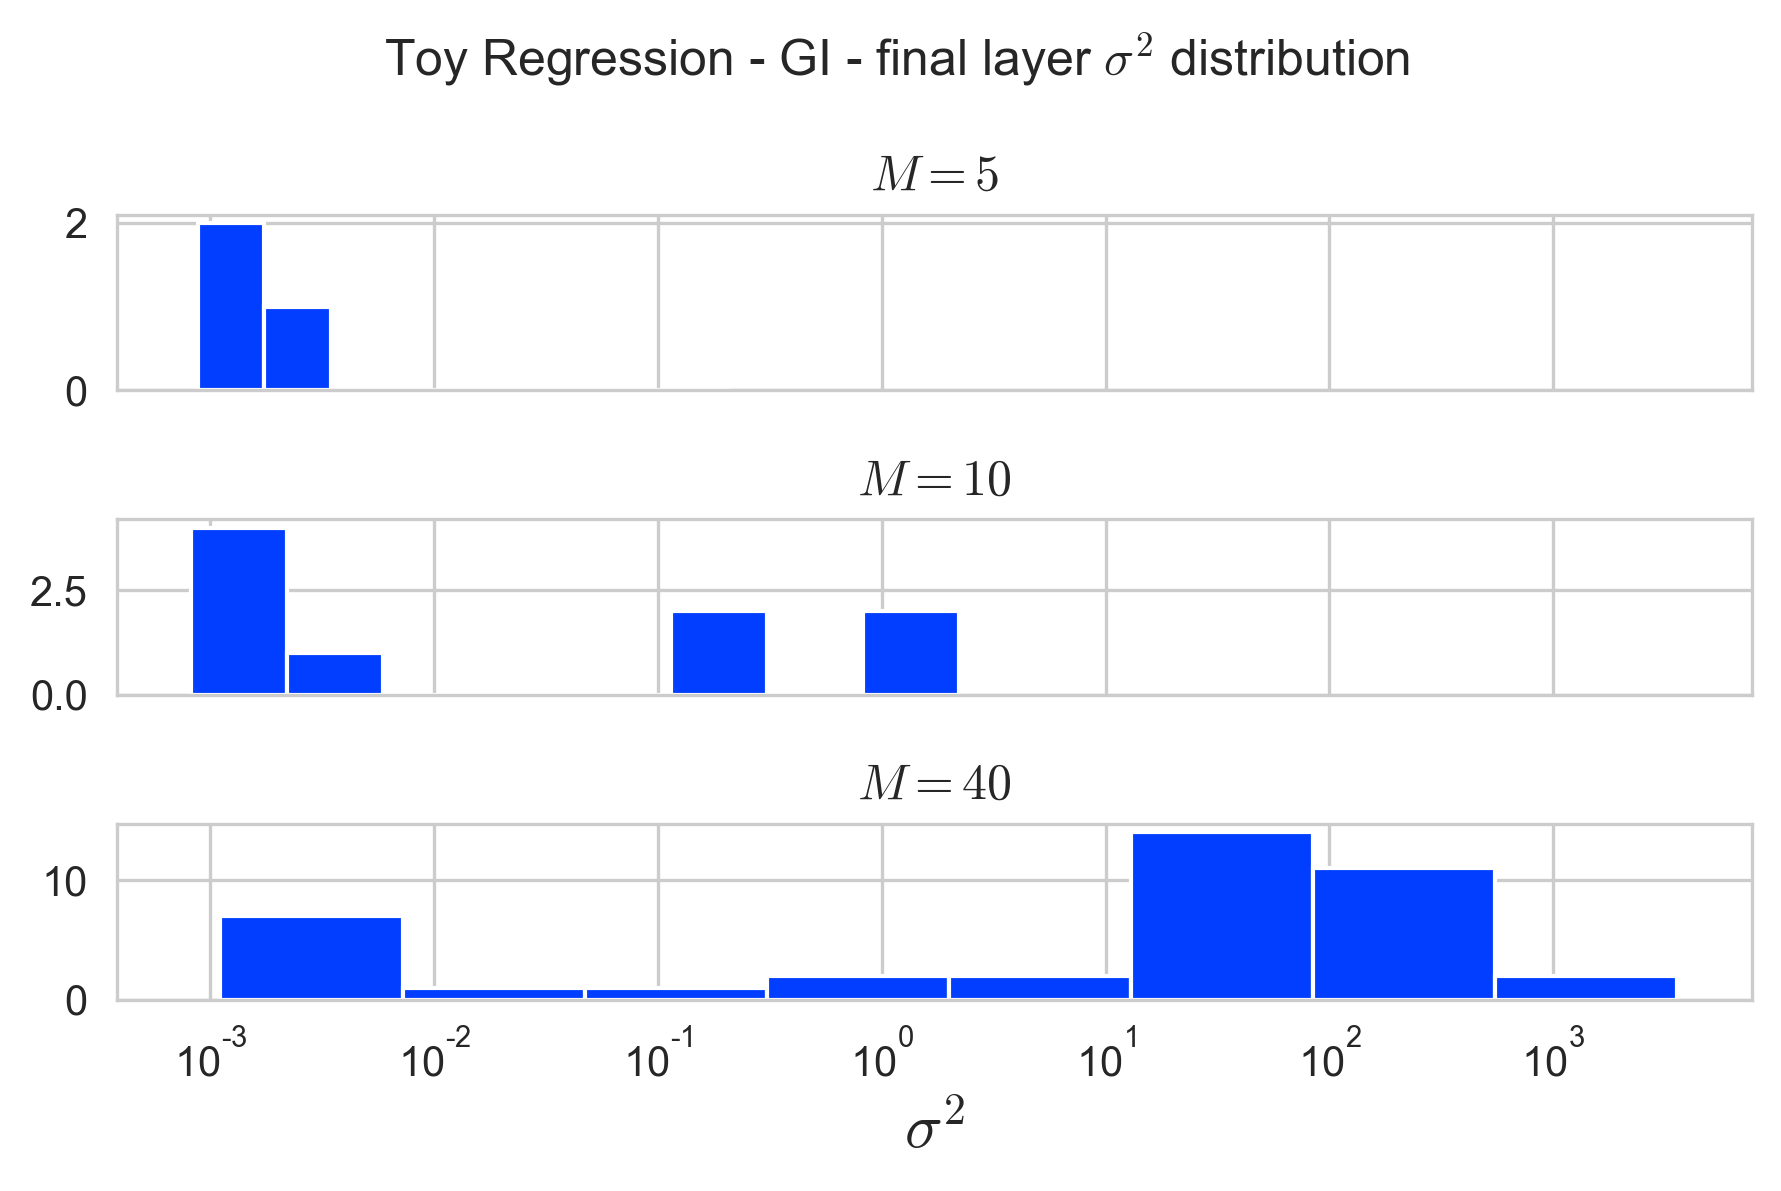

In [10]:
folders = {
    "T": "narratives/convergence/08-07-10.02.16_seq-pvi-ober-1c-1g-10000l-nealprior-40n-40b-0-01lr-2s-5m-1nz",
    "M": "narratives/inducing_behavior/08-07-18.12.09_seq-pvi-ober-1c-2g-10000l-nealprior-40n-40b-0-01lr-2s-10m-1nz", 
    "B": "narratives/inducing_behavior/08-07-18.20.53_seq-pvi-ober-1c-2g-10000l-nealprior-40n-40b-0-01lr-2s-40m-1nz",
}

fig, axs = plt.subplots(3, 1, sharex=True)
fig.suptitle(r"Toy Regression - GI - final layer $\sigma^{2}$ distribution")

axes = {"T": axs[0], "M": axs[1], "B": axs[2]}

for loc, f in folders.items():
    if f != "":
        plot_var(f, axes[loc])


titles = {"T": r"$M=5$", "M": r"$M=10$", "B": r"$M=40$"}
for loc, ax_title in titles.items():
    if ax_title != "":
        axes[loc].set_title(ax_title)
axes['B'].set_xlabel(r"${\sigma^2}$", fontsize=15)

plt.show()

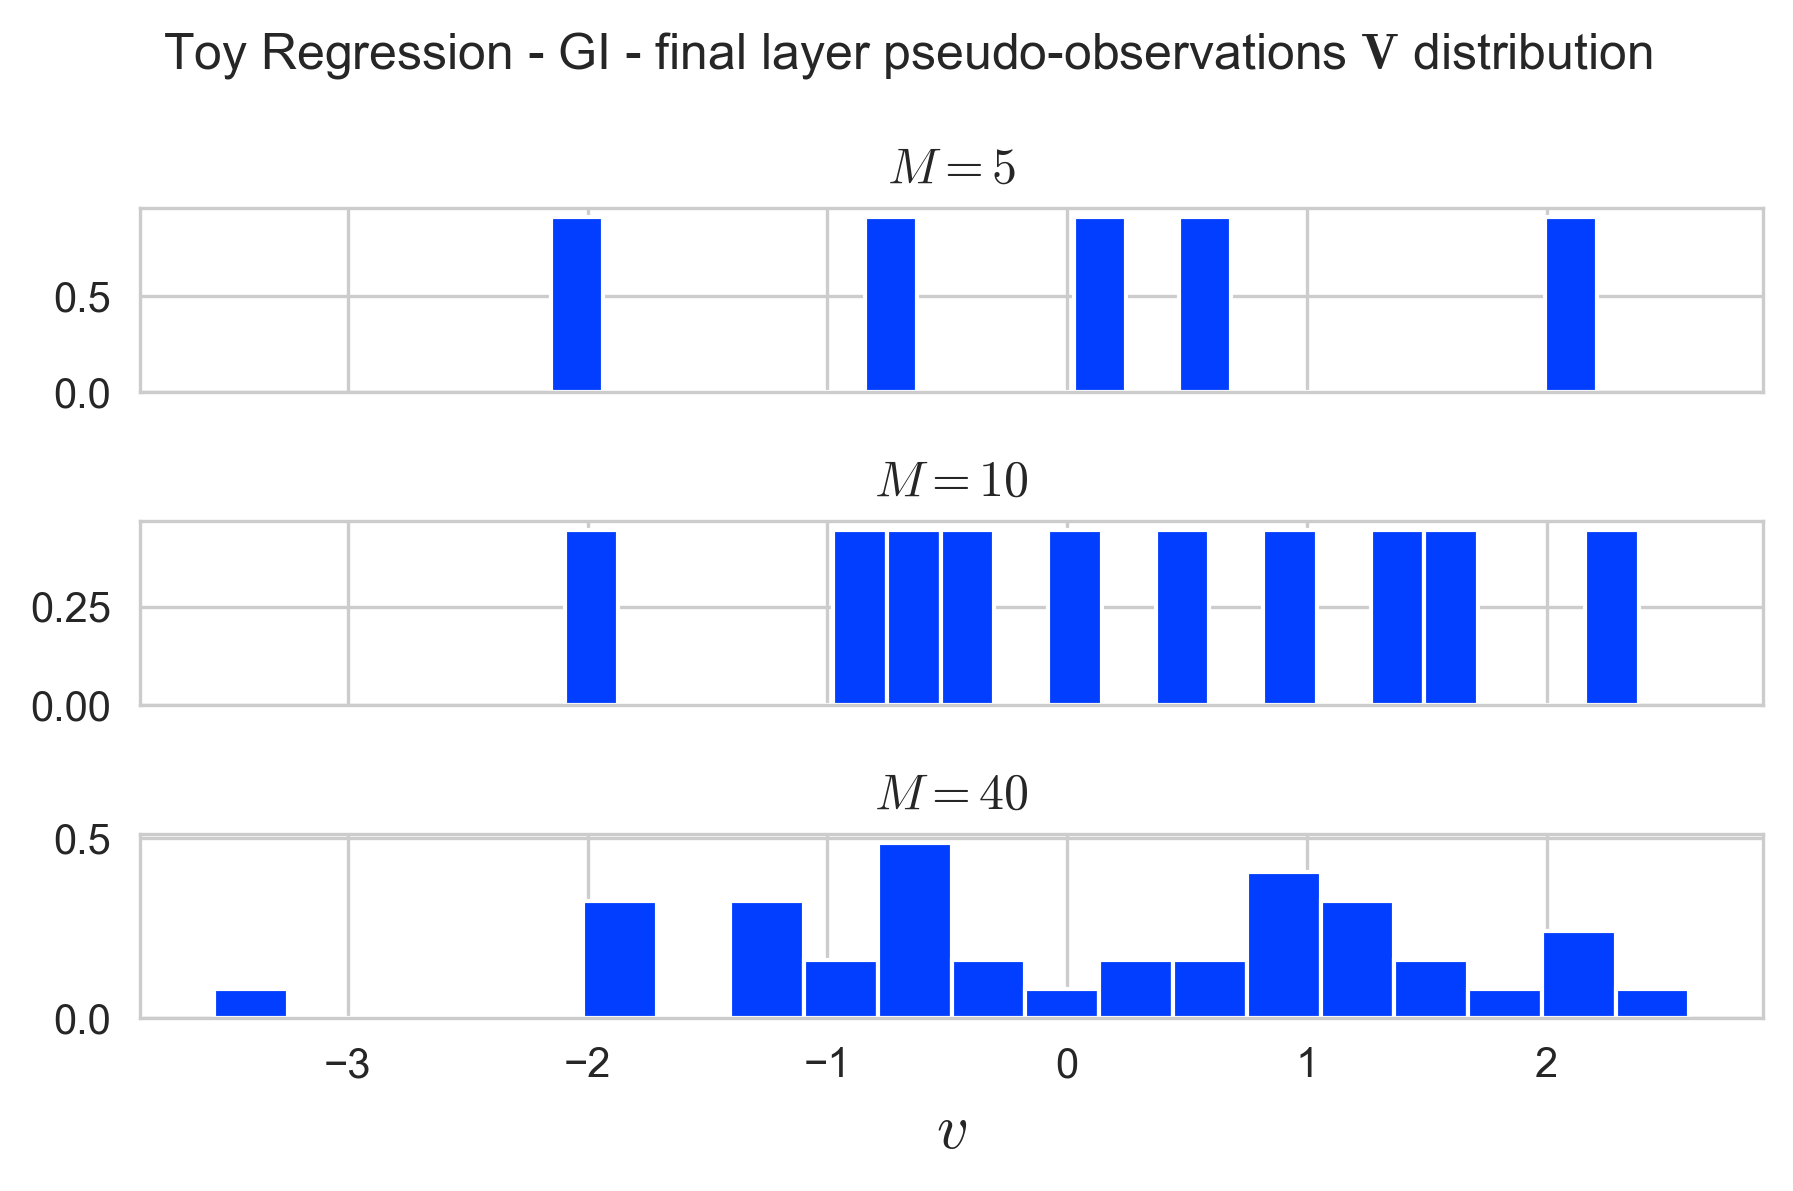

In [116]:
fig, axs = plt.subplots(3, 1, sharex=True)
fig.suptitle(r"Toy Regression - GI - final layer pseudo-observations $\mathbf{V}$ distribution")

axes = {"T": axs[0], "M": axs[1], "B": axs[2]}

for loc, f in folders.items():
    if f != "":
        plot_yz(f, axes[loc], layer=2, bins=20)


titles = {"T": r"$M=5$", "M": r"$M=10$", "B": r"$M=40$"}
for loc, ax_title in titles.items():
    if ax_title != "":
        axes[loc].set_title(ax_title)
axes['B'].set_xlabel(r"$v$", fontsize=15)

plt.show()

In [91]:
exp_dir = "narratives/convergence/08-07-10.02.16_seq-pvi-ober-1c-1g-10000l-nealprior-40n-40b-0-01lr-2s-5m-1nz"

In [6]:
exp_dir

'narratives/convergence/08-07-10.02.16_seq-pvi-ober-1c-1g-10000l-nealprior-40n-40b-0-01lr-2s-5m-1nz'

In [7]:
main_dir = os.path.dirname(os.path.abspath(os.getcwd()))
vs_path = os.path.join(exp_dir, "model/_vs.pt")
vs_state_dict = torch.load(os.path.join(main_dir, vs_path), map_location=torch.device('cpu'))

In [8]:
vs_state_dict.keys()

dict_keys(['zs.client0_z', 'ts.client0_layer0_yz', 'ts.client0_layer0_nz', 'ts.client0_layer1_yz', 'ts.client0_layer1_nz', 'ts.client0_layer2_yz', 'ts.client0_layer2_nz'])

In [43]:
vs: Vars = Vars(torch.float32)

for idx, name in enumerate(vs_state_dict.keys()):
    if name.__contains__("output_var") or \
        name.__contains__("nz"):

        vs.positive(vs_state_dict[name], name=name)
    else:
        print(name, vs_state_dict[name])
        vs.unbounded(vs_state_dict[name], name=name)

# vs.print()

narratives/convergence/08-07-10.02.16_seq-pvi-ober-1c-1g-10000l-nealprior-40n-40b-0-01lr-2s-5m-1nz
ts.client0_layer0_yz tensor([[-1.1512e+00,  2.4717e-01, -5.3977e-01, -6.5082e-02, -1.4101e+00,
         -1.8245e+00, -4.4596e-01, -1.4099e+00,  4.1275e-01,  7.9159e-01,
         -1.1868e+00, -5.1187e-01, -1.6483e+00,  2.5252e+00,  9.9360e-01,
         -1.1874e+00, -1.1815e+00, -9.1375e-01, -8.6370e-01,  5.9126e-02],
        [-8.5937e-01,  8.1215e-01, -1.1417e+00, -2.8731e+00, -2.9078e-01,
          4.5507e-02, -1.7936e+00,  1.3939e-01, -2.8326e+00, -2.2747e+00,
          1.6573e+00, -1.5428e+00, -7.7102e-03, -3.3142e-02, -5.0756e-01,
         -4.3207e-01, -1.5531e+00,  1.1719e+00,  1.7643e+00,  9.4401e-01],
        [-1.1548e+00, -5.8279e-01, -8.2042e-01,  1.1609e+00, -3.7078e-01,
          1.1115e+00, -1.0144e+00, -1.6793e+00, -3.1623e-01, -5.3942e-01,
          4.5753e-02,  4.9322e+00, -6.1561e-01, -1.2874e+00,  6.6900e-02,
         -1.0069e+00, -3.0016e-01, -1.9550e+00,  1.9079e+00, -1.

In [10]:
vs_state_dict.keys()

dict_keys(['zs.client0_z', 'ts.client0_layer0_yz', 'ts.client0_layer0_nz', 'ts.client0_layer1_yz', 'ts.client0_layer1_nz', 'ts.client0_layer2_yz', 'ts.client0_layer2_nz'])

In [11]:
vs['ts.client0_layer2_yz'][..., 0]

tensor([ 0.5271,  2.2094, -2.1527, -0.8391,  0.1384],
       grad_fn=<SelectBackward0>)

In [12]:
1/vs['ts.client0_layer2_nz']

tensor([[0.0014, 0.0017, 0.0020, 0.0009, 0.2093]], grad_fn=<MulBackward0>)

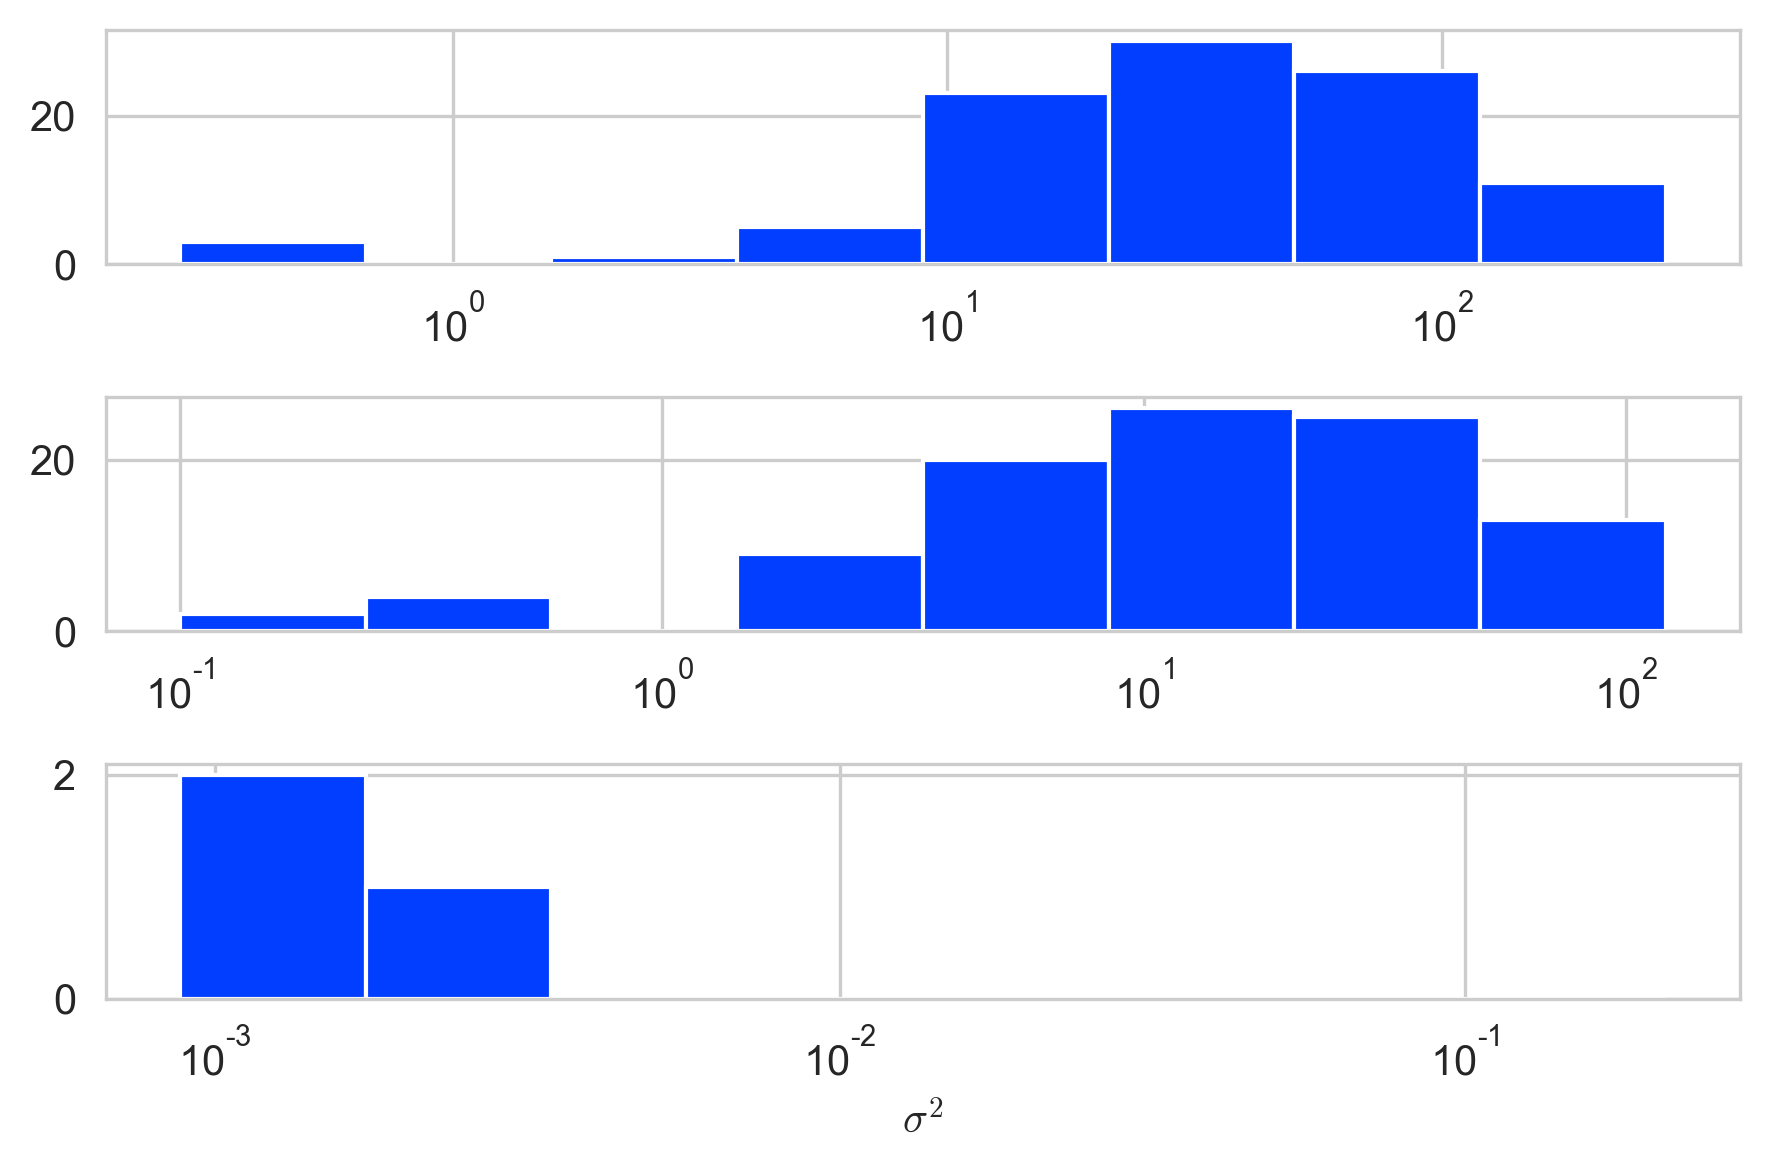

In [18]:
fig, axs = plt.subplots(1, 1)


plt.subplot(311)
num_bins = 8
x = pd.Series(1/vs['ts.client0_layer0_nz'].flatten().squeeze().detach().cpu())
hist, bins, = np.histogram(x, bins=num_bins)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(x, bins=logbins)
plt.xscale('log')

plt.subplot(312)
num_bins = 8
x = pd.Series(1/vs['ts.client0_layer1_nz'].flatten().squeeze().detach().cpu())
hist, bins, = np.histogram(x, bins=num_bins)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(x, bins=logbins)
plt.xscale('log')


ax = plt.subplot(313)
num_bins = 8
x = pd.Series(1/vs['ts.client0_layer2_nz'].flatten().squeeze().detach().cpu())
hist, bins = np.histogram(x, bins=num_bins)
logbins = np.logspace(np.log10(bins[0]), np.log10(bins[-1]), len(bins))
plt.hist(x, bins=logbins)
plt.xscale('log')
ax.set_xlabel(r"$\sigma^2$")
plt.show()


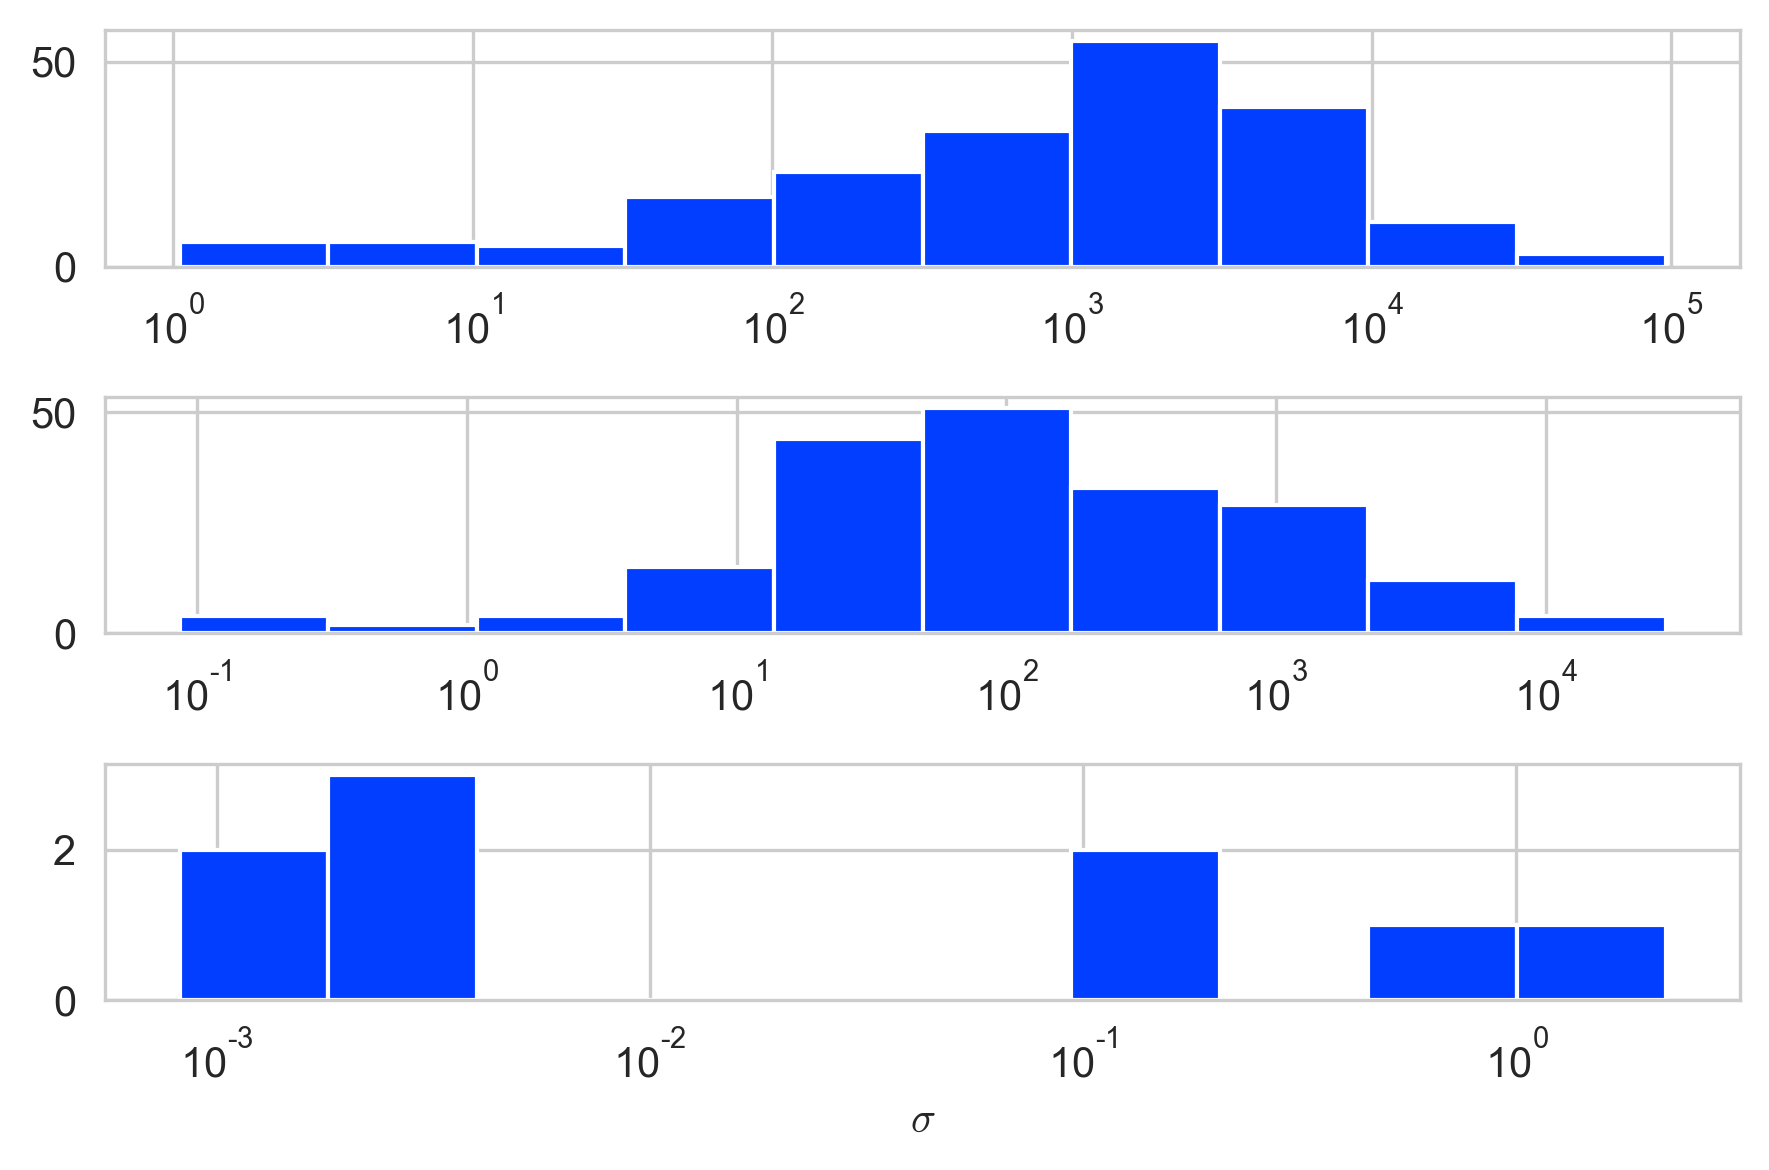

In [33]:
fig, axs = plt.subplots(1, 1)


plt.subplot(311)
num_bins = 10
x = pd.Series(1/vs['ts.client0_layer0_nz'].flatten().squeeze().detach().cpu())
hist, bins, = np.histogram(x, bins=num_bins)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(x, bins=logbins)
plt.xscale('log')

plt.subplot(312)
num_bins = 10
x = pd.Series(1/vs['ts.client0_layer1_nz'].flatten().squeeze().detach().cpu())
hist, bins, = np.histogram(x, bins=num_bins)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(x, bins=logbins)
plt.xscale('log')


ax = plt.subplot(313)
num_bins = 10
x = pd.Series(1/vs['ts.client0_layer2_nz'].flatten().squeeze().detach().cpu())
hist, bins, = np.histogram(x, bins=num_bins)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(x, bins=logbins)
plt.xscale('log')
ax.set_xlabel(r"$\sigma$^2")
plt.show()


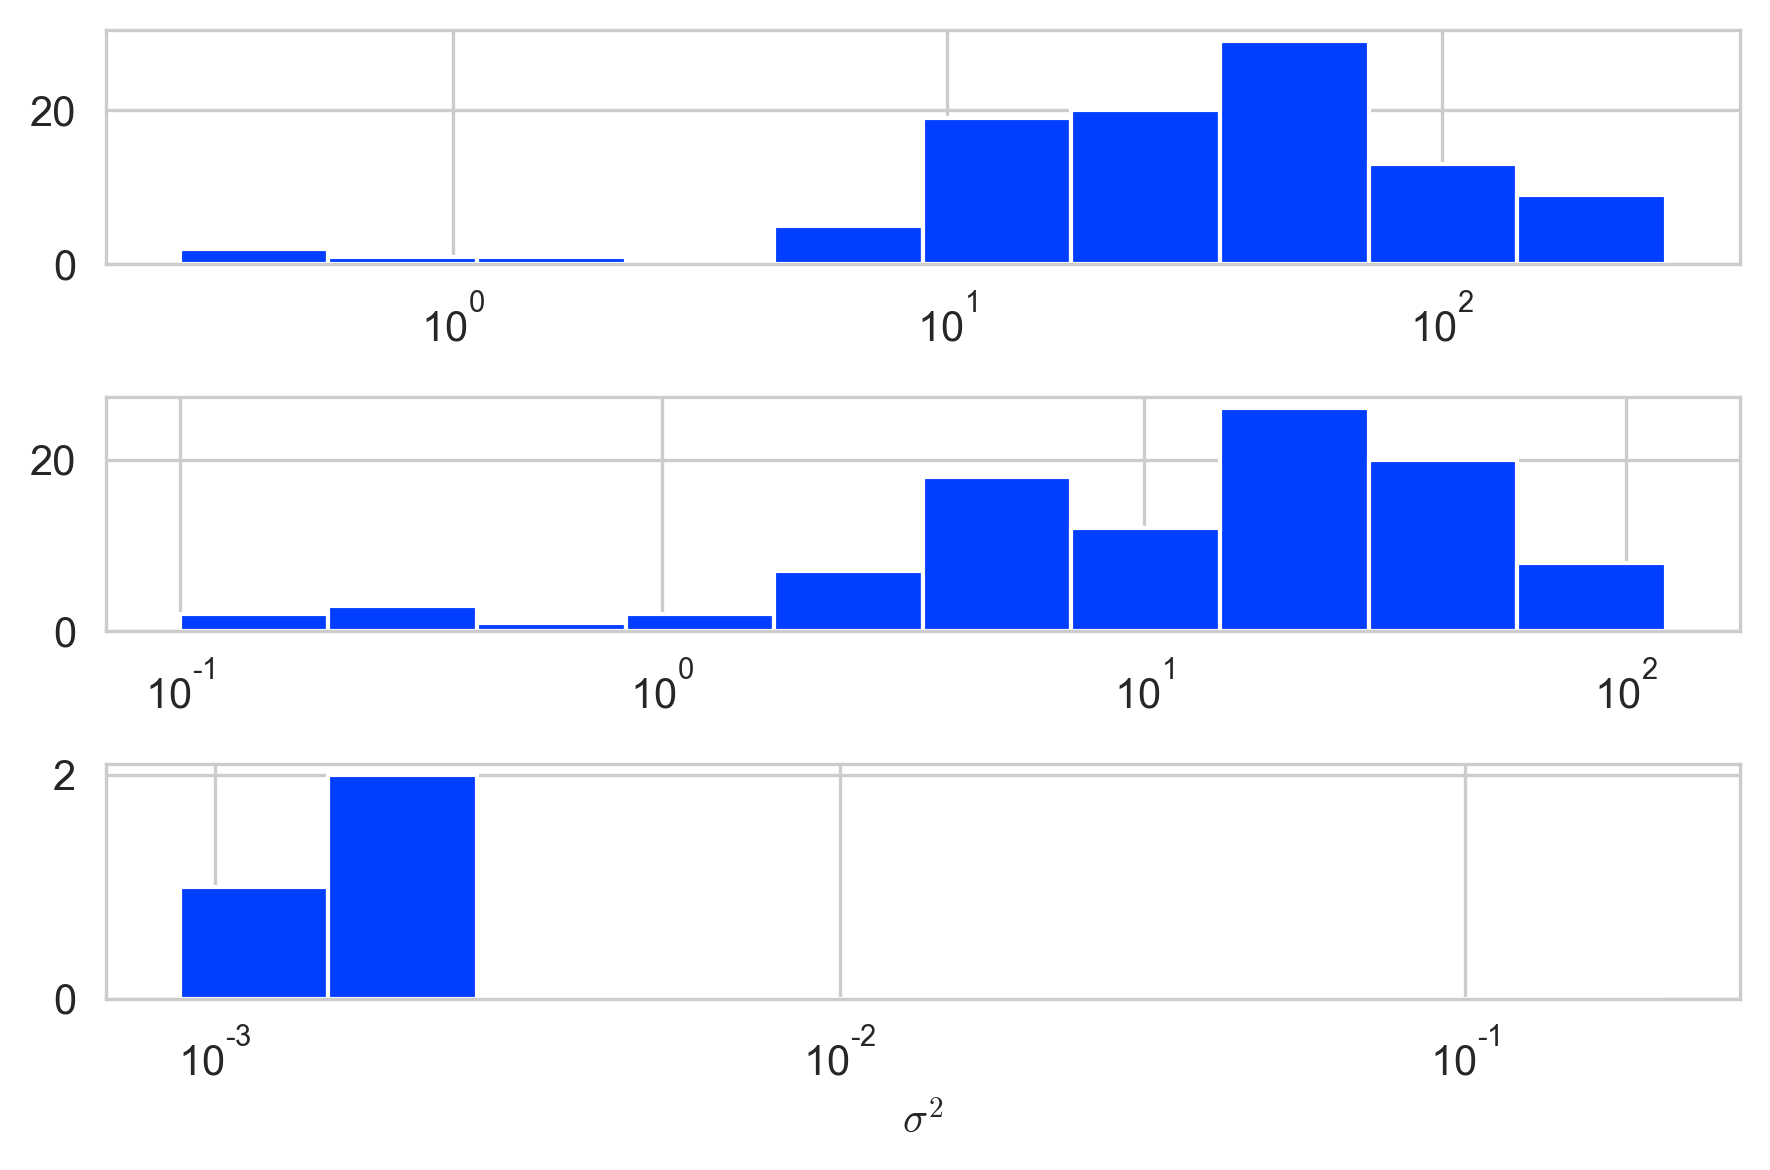

In [17]:
fig, axs = plt.subplots(1, 1)


plt.subplot(311)
num_bins = 10
x = pd.Series(1/vs['ts.client0_layer0_nz'].flatten().squeeze().detach().cpu())
hist, bins, = np.histogram(x, bins=num_bins)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(x, bins=logbins)
plt.xscale('log')

plt.subplot(312)
num_bins = 10
x = pd.Series(1/vs['ts.client0_layer1_nz'].flatten().squeeze().detach().cpu())
hist, bins, = np.histogram(x, bins=num_bins)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(x, bins=logbins)
plt.xscale('log')


ax = plt.subplot(313)
num_bins = 10
x = pd.Series(1/vs['ts.client0_layer2_nz'].flatten().squeeze().detach().cpu())
hist, bins, = np.histogram(x, bins=num_bins)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(x, bins=logbins)
plt.xscale('log')
ax.set_xlabel(r"$\sigma^2$")
plt.show()
